## Name - Sanjeev Kumar

### Exploratory Data Analysis - Terrorism

### Objective
##### ● As a security/defense analyst, try to find out the hot zone of terrorism.
##### ● What all security issues and insights you can derive by EDA?


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
pd.set_option('display.max_columns',150)

### Load data

In [53]:
data = pd.read_csv('globalterrorism.csv',encoding='latin1')
print(data.shape)

(181691, 135)


In [54]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

### Data Cleaning

In [3]:
# columm name are vague let's rename the columns to something meaningful
data.rename(columns={'iyear':'Year',
                       'imonth':'Month',
                       'iday':'Day',
                       'country_txt':'Country',
                       'region_txt':'Region',
                       'attacktype1_txt':'AttackType',
                       'target1':'Target',
                       'nkill':'Killed',
                       'nwound':'Wounded',
                       'summary':'Summary',
                       'gname':'Group',
                       'targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type',
                       'motive':'Motive'},
              inplace=True)

In [4]:
# data_new = data.dropna(thresh=160000,axis=1)

In [5]:
# select useful columns from dataset
data = data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target',
             'Summary','Group','Target_type','Weapon_type','Motive']]

# adding casualities columns
data['casualities']=data['Killed']+data['Wounded']
data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [50]:
data.shape

(181691, 18)

### Q- let's check does data contains any null values

In [6]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

### Let's see info of database how many columns and data types of each columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

### Let's see statistical summary of numerical columns like- mean, min, max and std.

In [8]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### How many unique values each columns contains

In [9]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
casualities       341
dtype: int64

### Basics Analysis

In [10]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [11]:
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [42]:
print('Maximum people killed in an attack are:',data['Killed'].max())

Maximum people killed in an attack are: 1570.0


In [13]:
print("Year with the most attacks:",data['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [14]:
print("Month with the most attacks:",data['Month'].value_counts().idxmax())

Month with the most attacks: 5


In [15]:
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


## Now let's see trends of Terrorist activities over year

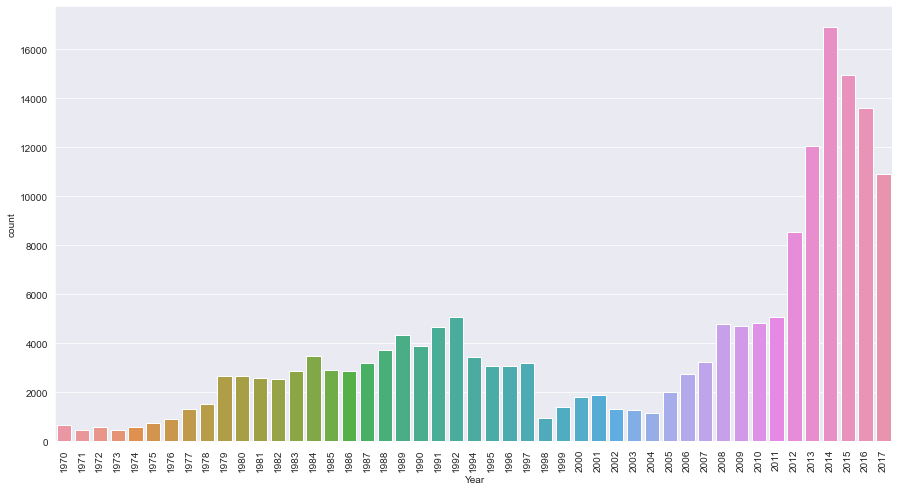

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(data['Year'])
plt.xticks(rotation=90)
plt.show()

#### from above plot's we can see that terrorist activites has rapidly increased after 2005 and it was at peak in 2014

## Top 10 suffering countries

In [17]:
data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

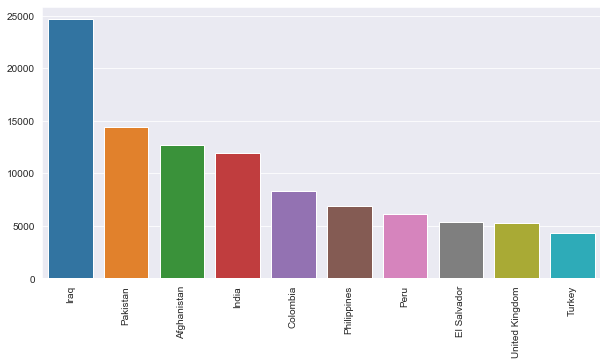

In [18]:
plt.figure(figsize=(10,5))
x = data['Country'].value_counts().values[:10]
y = data['Country'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

### from above plot it is clear that Iraq is most affected country.

### Top 10 suffering cities 

In [19]:
data['city'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

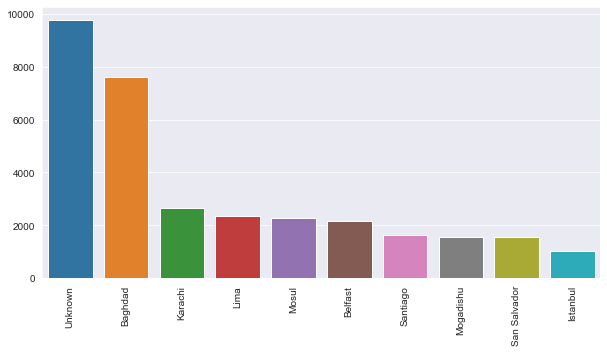

In [20]:
plt.figure(figsize=(10,5))
x = data['city'].value_counts().values[:10]
y = data['city'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

#### Baghdad is most affected cities due to terrorism

### Top 10 suffering Region

In [21]:
data['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

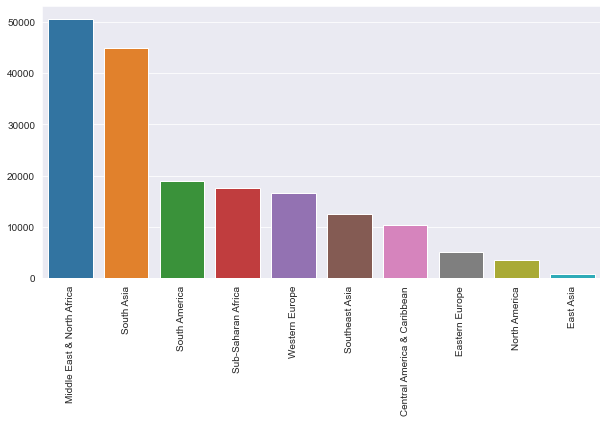

In [48]:
plt.figure(figsize=(10,5))
x = data['Region'].value_counts().values[:10]
y = data['Region'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

### Middle east and North africa is most suffering region

## Now let's Country wise killing

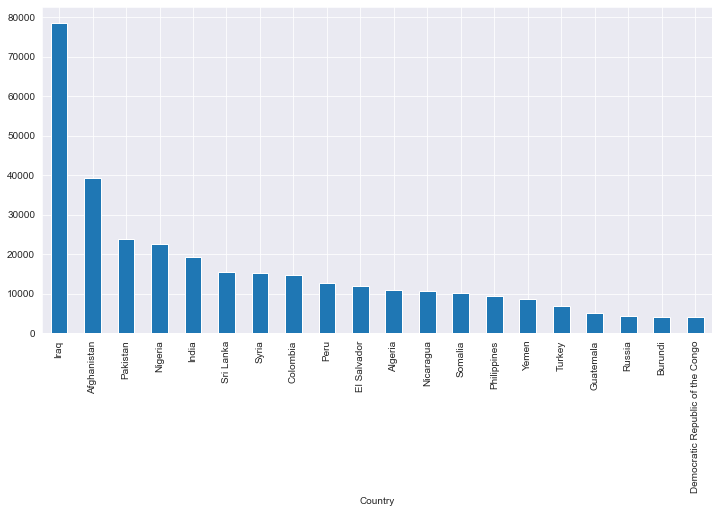

In [23]:
plt.figure(figsize=(12,6))
data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

### Iraq has most killing by terrorist

## Region and killing stats

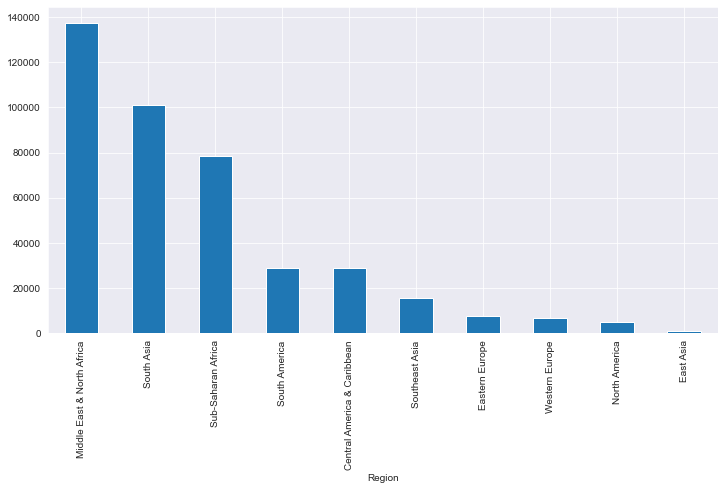

In [24]:
plt.figure(figsize=(12,6))
data.groupby('Region')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Terrorist Activities by Region Each Year

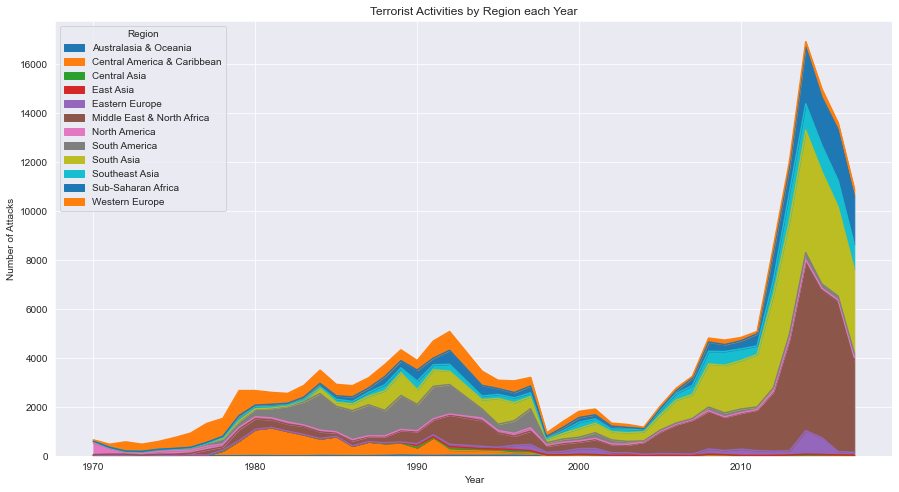

In [25]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Activities by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### From the above plot we can see that terrorist activites has increased over years in region  and it was at peak after 2010.

## Terrorist most preferable Attack Type 

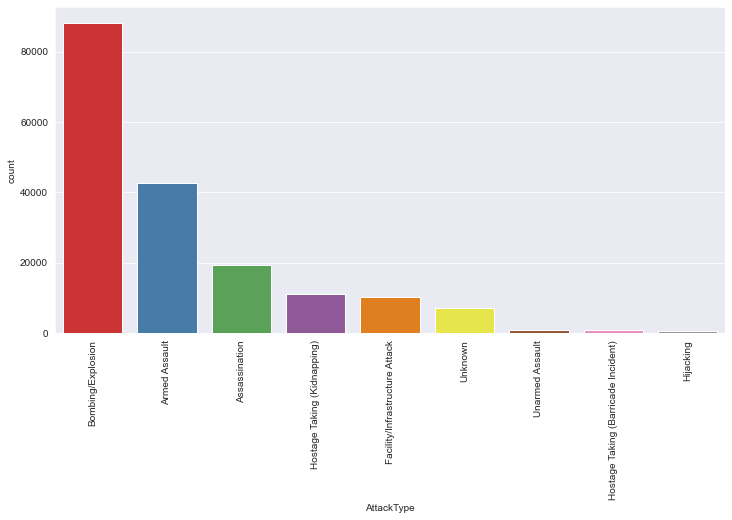

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data['AttackType'],order=data['AttackType'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

### Bombing/Explosion is most preferable attack type

## Terrorist Preferable Target Type

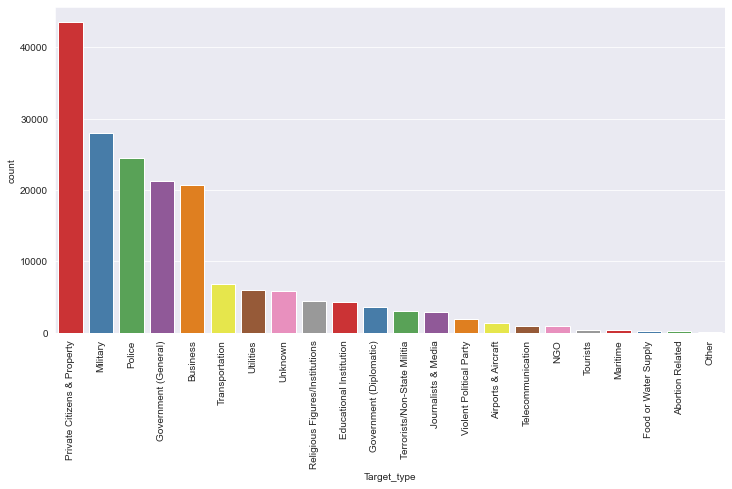

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data['Target_type'],order=data['Target_type'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

### Private Citizens & Property was most target type.

## Terrorist Group with highest Attack

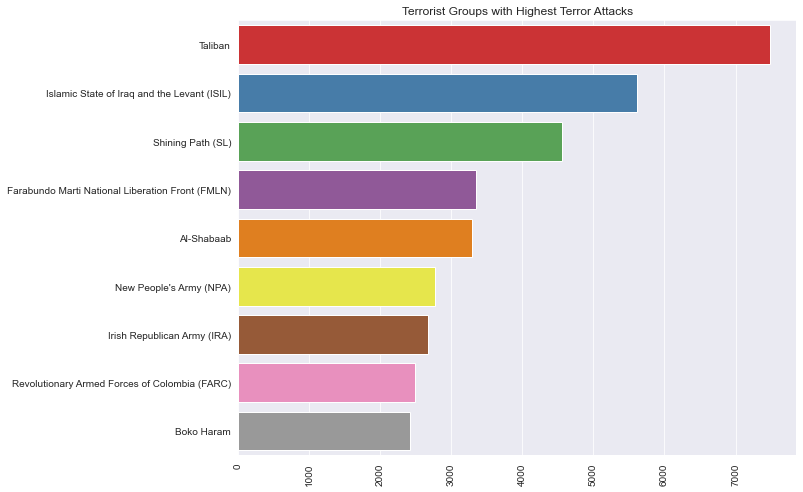

In [43]:
sns.barplot(data['Group'].value_counts()[1:10].values,data['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Taliban has most no of attacks 

# Terrorism in India

In [29]:
group_country = data.groupby('Country')
india = group_country.get_group('India')

### Most affected citites of India

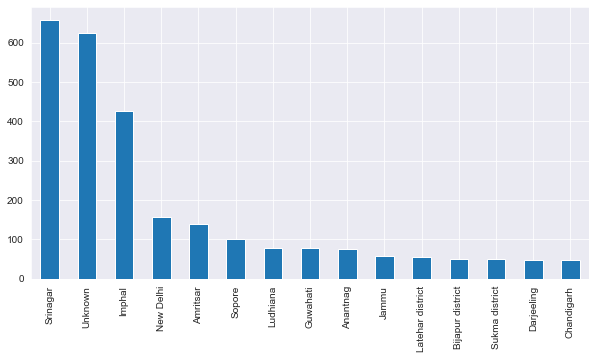

In [44]:
india['city'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.show()

### Srinagar is most affected cities of India

# terrorist activites trends over the year

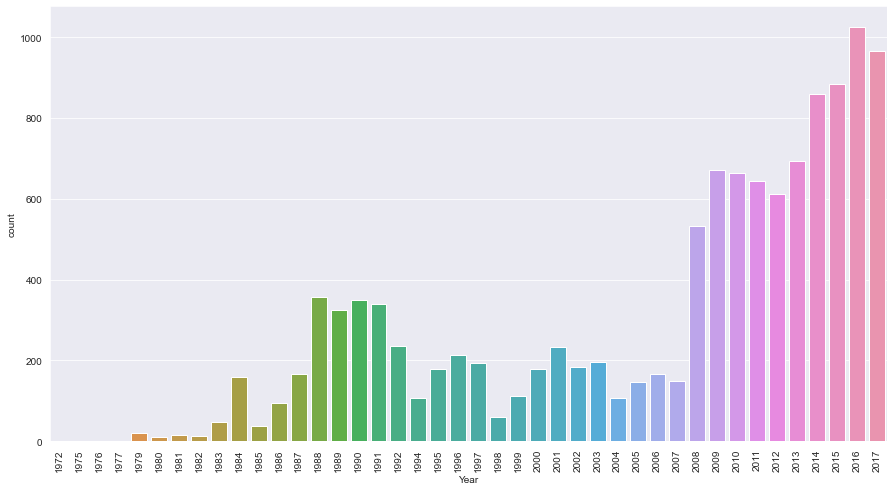

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(india['Year'])
plt.xticks(rotation=90)
plt.show()

### Deadliest terrorist groups in India

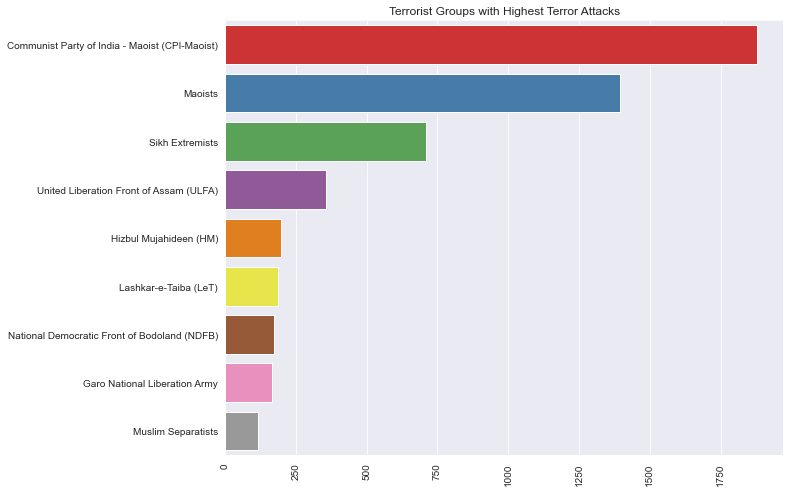

In [32]:
sns.barplot(india['Group'].value_counts()[1:10].values,india['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Killings Trends over year

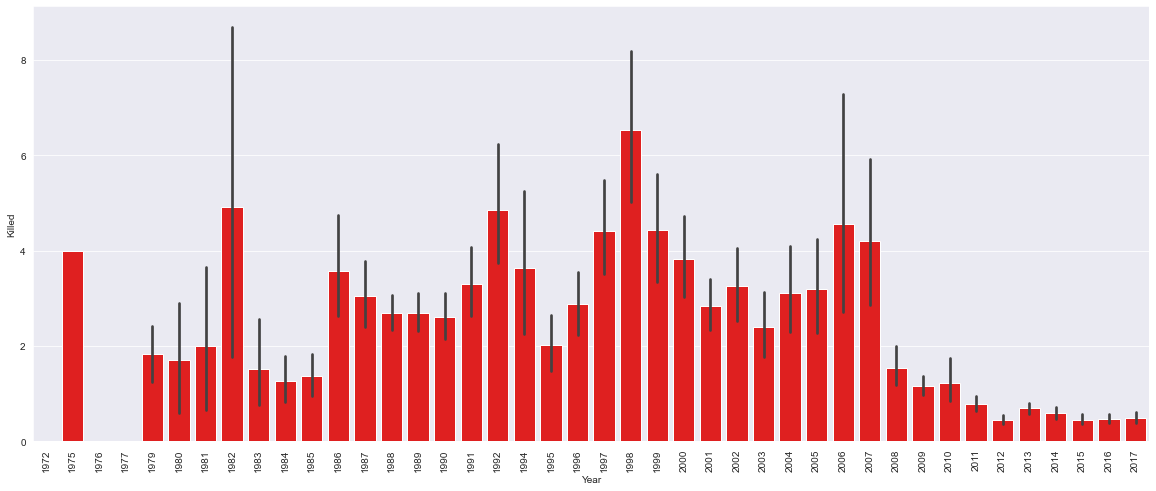

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(india['Year'],india['Killed'],color='red')
plt.xticks(rotation=90)
plt.show()

### most preferable attack type in India

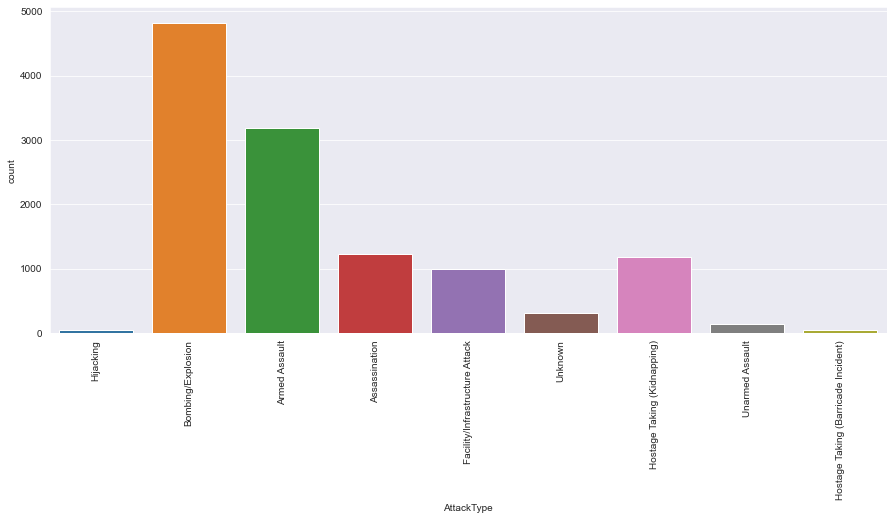

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(india['AttackType'])
plt.xticks(rotation=90)
plt.show()

## Conclusions:-

###### 1-Hot zones of terrorism is Middle east and North Arica so, all the countries should focus in these region.
###### 2-Iraq, Afganistan and Pakistan most suffered country, Government should be aware from the citizens of these countries
###### 3-Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.
###### 4-Government should tighten borders and should strict arms law.
###### 5-All country should have to make pact to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.